![Scipy Logo](images/scipy_logo2.PNG)

## An Overview of Scipy and Scipy.Stats

---

### **Firstly what is SciPy**

SciPy is an open source scientific library for Python which gives us the ability to perform Mathematical, Scientific and Engineering Computations. SciPy also provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems..

The SciPy library is built to work with NumPy arrays and provides use with many user-friendly and efficient numerical practices such as routines for numerical integration and optimization. NumPy and SciPy are easy to use, but powerful enough to be used by some of the world's leading scientists and engineers.!!! 

#### **What is SciPy.stats?**

All of the statistics functions of the SciPy library are located in the sub-package named scipy.stats. used for statistical analysis

##### **Uses of SciPy.stats**

From my research I found out that the stats module scipy.stats is a very important feature of SciPy. 

It is useful for obtaining probabilistic distributions. SciPy Stats can generate discrete or continuous random numbers. It also consists of many other functions to generate descriptive statistical values. We can deal with random, continuous, and random variables. It also has functions for working with various types of distributions. 

It offers us the ability to perform a wide range of statistic analysis.

[1] https://scipy.org/

[2] https://www.tutorialspoint.com/scipy/scipy_quick_guide.htm

[3] https://docs.scipy.org/doc/scipy/reference/stats.html

### **Overview of ANOVA Testing**

ANOVA is a means of comparing the ratio of systematic variance to unsystematic variance in an experimental study. Variance in the ANOVA is partitioned into total variance, variance due to groups, and variance due to individual differences.

The ratio obtained when doing this comparison is known as the F-ratio. A one-way ANOVA can be seen as a regression model with a single categorical predictor. This predictor usually has two plus categories. A one-way ANOVA has a single factor with J levels. Each level corresponds to the groups in the independent measures design

Each experimental condition should have roughly the same variance (i.e., homogeneity of variance), the observations (e.g., each group) should be independent, and the dependent variable should be measured on, at least,  an interval scale.
https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/


#### Assumptions 
- Assumption 1: Dependent variable*** -Dependent variable should be measured at the interval or ratio level
- Assumption 2: Independent variable*** - Independent variable should consist of two or more categorical, independent groups.
- Assumption 3: You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves
- Assumption 4: Outliers - There should be no significant outliers.
- Assumption 5: Normality -  Dependent variable should be approximately normally distributed for each category of the independent variable.
- Assumption 6: Homogeneity of Variances - There needs to be homogeneity of variances

I will go through these 6 assumptions below when performing my Anova Testing below on my sample datasets.


#### A word on T - Tests 

T Test  is a statistical significance test that is used to compare the means of two groups and determine if the difference in means is statistically significant.

T-tests are several types of hypothesis testing and are among the most common statistical tests performed in world. Tests include on sample, standard t-Test and paired sample. In general they all follow the same pattern.

Example -  we could use a independent t-test to understand whether first year graduate salaries differed based on gender (i.e., your dependent variable would be "first year graduate salaries" and your independent variable would be "gender", which has two groups: "male" and "female").

##### t-Test demo

I am going to perfrom a demo t-Test oon te grades dataset which is availabel at []. The aim of the test is to is see is the diffenrce in the mean final grade is statiscally significant per gender (male or female)

_________________

I will start with my imports, importing the standard ones numpy, seaborn, pandss etc and then the Scipy stats molibrary and the t-Test module required

In [1]:
# Numerical arrays.
import numpy as np
# Plotting.
import seaborn as sns
#pandas for dataframes 
import pandas as pd
# Stats scipy stats
import scipy.stats as ss
## scipy stats t-Test
from scipy.stats import ttest_ind

Next i will import in my test datasets - this will be the Grades Dataset and will import it using pandas as a data frame

In [2]:
#import in my dataset
df_grades = pd.read_csv('datasets/grades/exam_grades.csv')

In [6]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            232 non-null    int64  
 1   sex           232 non-null    object 
 2   exam1         232 non-null    float64
 3   exam2         232 non-null    float64
 4   exam3         232 non-null    float64
 5   course_grade  232 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.0+ KB


In [15]:
#to convert gender to a cateogroy rather than object
df_grades["sex"] = df_grades["sex"].astype("category")
sex = df_grades["sex"]
course_grade = df_grades['course_grade']

Next i will give a visual representation of my categories using a catplot and box plot from the seaborn plotting library
links to catplot and box plot 

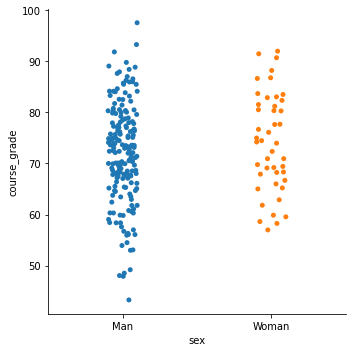

In [11]:
sns.catplot(x ='sex', y ='course_grade',jitter=True ,data=df_grades);

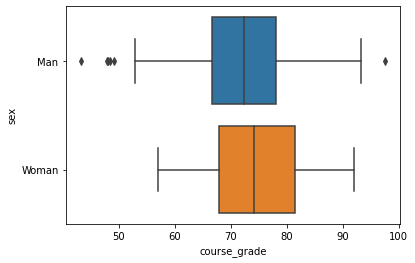

In [12]:
sns.boxplot(x = df_grades['course_grade'], y =df_grades['sex']);

Ok so we can see from above that there is a bigger spread of results for males with some outliers showing on the box plot. However both plots are showing the mean is in around 73 to 75 so i would imagine the result of my t-Test to show that there no statistical significance in the diference of the mean grade - lets see

In [17]:
#define my two groups
male_group = df_grades.loc[df_grades["sex"] =='Man',"course_grade"]
female_group = df_grades.loc[df_grades["sex"] =='Woman', "course_grade"]
#run my t test using ttest_ind from scipy stats
t_ss, p_ss = ss.ttest_ind(male_group,female_group)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
#round to 2 decimal 
print(f"P_scipy: {p_ss:0.2f}")

t-value: -1.421028169981253	p-value: 0.15666292284818942
P_scipy: 0.16


__Null hypothesis__
All statistical tests have a null hypothesis. For most tests, the null hypothesis is that there is no relationship between your variables of interest or that there is no difference among groups.

_The P Value__

https://www.scribbr.com/statistics/p-value/

The p-value, or probability value, tells you how likely it is that your data could have occurred under the null hypothesis.
The p-value tells you how often you would expect to see a test statistic as extreme or more extreme than the one calculated by your statistical test if the null hypothesis of that test was true. The p-value gets smaller as the test statistic calculated from your data gets further away from the range of test statistics predicted by the null hypothesis.
The p-value is a proportion: if your p-value is 0.05, that means that 5% of the time you would see a test statistic at least as extreme as the one you found if the null hypothesis was true.


![image](https://th.bing.com/th/id/R.470e9336f6c1b6ade719d9dd809a251e?rik=alXMZh6%2f7Zrk%2fg&riu=http%3a%2f%2fdsm1lp.files.wordpress.com%2f2012%2f02%2f2008_03_10_null_hypothesis.jpg&ehk=gmv1erPErrMTRVjyiXJV6IOoN4PJUUSaPo7cBsDBuLw%3d&risl=&pid=ImgRaw&r=0)

__Ok so what does our values tell us__

In our  comparison of final course grades per gender groups our p-value is .16 or 16% , above our threshold value of 0.05; therefore we can determine that there is NO statistically significant difference final grades between the gender groups male and female. This is an interest post where the opposite was the finding and there as a statistical significance between the gender groups - https://www.southampton.ac.uk/passs/gcse_scores/bivariate_analysis/t_test.page

So what if I had 3 groups that needed testing?

We learnt from the lectures that using more than 2 groups for t tests is a bad idea (like 3 t tests) - the chance that you will get an error in your analysus becomes unpredictable and will result in artificially low p-values and lets you overestimate the significance of the difference between groups, , using anova testing is then better as we only need to run one test.

For demo and comparison im going to run a one way ANOVA test which is covered in the next section to see what score we get

In [19]:
F,P = ss.f_oneway(male_group,female_group)
print(f"{P:.2f}")

0.16


same p value using the Scipy.stats one way ANOVA test

### ANOVA

__ANOVA__, which stands for __Analysis of Variance__, is a statistical test used to analyze the difference between the means of more than two groups.

A one-way ANOVA uses one independent variable, while a two-way ANOVA uses two independent variables.

- The null hypothesis of ANOVA is that there is no difference among group means. - 
- The alternate hypothesis is that at least one group differs significantly from the overall mean of the dependent variable.

## Demonstrations of Anova

## Exploring the dataset - work data

For my demonstations i am going to use a workdataset that i extracted using our BI tool pentaho. 
My aim is to check for statistical differences between the amounts borrowed for personal loans up to 8,000 (dependent variable) and my independing varibales. We are looking at introducing a new revovling credit loan with a maximum value of 8,000. The results could be useful from a rollout and marketing viewpoint.
- per deomgraphich category (one way anova)
- per domographic cateogory and loan category (two way anova)

Firstly import my data

In [24]:
#import dataset
df = pd.read_csv('datasets/work/work_data.csv')
#display daframe
df

,Demographic_Category,Loan_Category,Loan_Amount_Issued
0,YOUNG SINGLE,PERSONAL,250.0
1,YOUNG SINGLE,PERSONAL,250.0
2,YOUNG SINGLE,PERSONAL,250.0
3,YOUNG SINGLE,PERSONAL,250.0
4,YOUNG SINGLE,PERSONAL,250.0
...,...,...,...
2491,OVER 50s,PERSONAL,8000.0
2492,OVER 65s,PERSONAL,8000.0
2493,OVER 65s,PERSONAL,8000.0
2494,OVER 65s,PERSONAL,8000.0


__Tidy Data__
This dataset is very clean as it has been manipulated and extracted using a BI tool removing empty values etc - this may not always be the case with a real world dataset

Exploring our data further with pandas tools df.head and df.describe - lets see what we have to work with

In [27]:
#display on screen first 5 rows
df.head()

,Demographic_Category,Loan_Category,Loan_Amount_Issued
0,YOUNG SINGLE,PERSONAL,250.0
1,YOUNG SINGLE,PERSONAL,250.0
2,YOUNG SINGLE,PERSONAL,250.0
3,YOUNG SINGLE,PERSONAL,250.0
4,YOUNG SINGLE,PERSONAL,250.0


In [28]:
#show a tabular discription of the dataset
df.describe()

,Loan_Amount_Issued
count,2496.000000
mean,2364.489042
std,2115.866110
min,250.000000
25%,600.000000
50%,1500.000000
75%,3500.000000
max,8000.000000


### Anova Test 1 - One way anova

#### Assumptions

When we choose to analyse our data using a one-way ANOVA, part of the process involves checking to make sure that the data we want to analyse can actually be analysed using a one-way ANOVA. We need to do this because it is only appropriate to use a one-way ANOVA if our data "passes" six assumptions that are required for a one-way ANOVA to give you a valid result.
[https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php]

______________

***Assumption 1: Dependent variable***

Dependent variable should be measured at the interval or ratio level.

In [32]:
# Loam Amount Issued is The dependent variable.
#df["Loan_Amount_Issued"] = df.Loan_Amount_Issued.astype(float)
dependent = df['Loan_Amount_Issued']
x = dependent
x

0        250.0
1        250.0
2        250.0
3        250.0
4        250.0
         ...  
2491    8000.0
2492    8000.0
2493    8000.0
2494    8000.0
2495    8000.0
Name: Loan_Amount_Issued, Length: 2496, dtype: float64

Yes we can be happy that assumption 1 is satisfied and our data is at/in numerical intervals 

________________

***Assumption 2: Independent variable***

Independent variable should consist of two or more categorical, independent groups.

In [33]:
# Independent variable.
independent = df['Demographic_Category']
independent
#use grouby and get count of each gender in dataset
df.groupby(by = "Demographic_Category").count()

,Loan_Category,Loan_Amount_Issued
Demographic_Category,,
ADULT SINGLE,255,255
OVER 50s,586,586
OVER 65s,374,374
SINGLE PARENT,434,434
YOUNG COUPLE,75,75
YOUNG FAMILY,293,293
YOUNG SINGLE,479,479


So for my first test one way anova we are going to use the demographic category as my dependent variable which has seven independent groups as required 

_______________________________

**Assumption 3:**

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves

Check - age demographic has to fit into one of the cateogries - you cant have two ages

______________

***Assumption 4: Outliers***

There should be no significant outliers.

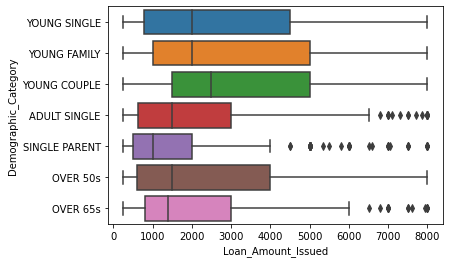

In [34]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

There is a few "stray" values but im happy the majority of the values/counts are withing the required ranges and will proceed.

_______________

***Assumption 5: Normality***

Dependent variable should be approximately normally distributed for each category of the independent variable.

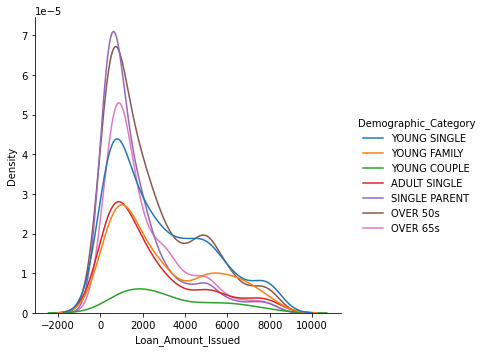

In [35]:
# KDEs of the three categories.

# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

_______________

***Assumption 6: Homogeneity of Variances***

There needs to be homogeneity of variances

In [36]:
# Test for equal variances.
ss.levene(

    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'YOUNG FAMILY'],
    dependent[independent == 'YOUNG COUPLE'],
    dependent[independent == 'ADULT SINGLE'],
    dependent[independent == 'SINGLE PARENT'],
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'OVER 65s'],
)

LeveneResult(statistic=12.544527329160967, pvalue=5.578715322188425e-14)

## Performing a One Way Anova on my sample work dataset

In [ ]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG COUPLE'],
    dependent[independent == 'YOUNG FAMILY'],
    )

In [ ]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG COUPLE'],
    dependent[independent == 'SINGLE PARENT'],
    )

In [ ]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'ADULT SINGLE'],
    )

In [ ]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'OVER 65s'],
    )

In [ ]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'ADULT SINGLE'],
    )

We can see that the significance value is 0.021 (i.e., p = .021), which is below 0.05. and, therefore, there is a statistically significant difference in the mean length of time to complete the spreadsheet problem between the different courses takE

## WELCH ANOVA

### Exploring the dataset - exam grades

In [ ]:
#import dataset
#df_grades= pd.read_csv('datasets/grades/exam_grades.csv')
#display daframe
df_grades

In [ ]:
#display on screen first 5 rows
df_grades.head()

In [ ]:
#show a tabular discription of the dataset
df_grades.describe()

### **Assumptions**

When we choose to analyse our data using a one-way ANOVA, part of the process involves checking to make sure that the data we want to analyse can actually be analysed using a one-way ANOVA. We need to do this because it is only appropriate to use a one-way ANOVA if our data "passes" six assumptions that are required for a one-way ANOVA to give you a valid result. [https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php]

***Assumption 1: Dependent variable***

Dependent variable should be measured at the interval or ratio level.

In [ ]:
# Course grade is The dependent variable.
dependent2 = df_grades['course_grade']
x = dependent2
x

***Assumption 2: Independent variable***

Independent variable should consist of two or more categorical, independent groups.

Check - Independent variable will be gender - male or female

In [ ]:
# Independent variable.
independent2 = df_grades['sex']
independent2
#use grouby and get count of each gender in dataset
df_grades.groupby(by = "sex").count()

**Assumption 3:**

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves

Check - gender has to be either male or female

***Assumption 4: Outliers***

There should be no significant outliers.

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent2, y=independent2)

Check - We can note from above there is some outliers for male but should not be significant enough to affect our anova, this can be seen with the outliers shows as diamond symbols -  further testing to see ...

***Assumption 5: Normality***

Dependent variable should be approximately normally distributed for each category of the independent variable.

In [ ]:
# KDEs of the three categories.

# KDEs of the three categories.
sns.displot(x=dependent2, hue=independent2, kind="kde")

We can see from plot above both the dependent variable "grade" for each gender can be classed as normally distributed

***Assumption 6: Homogeneity of Variances***

There needs to be homogeneity of variances

In [ ]:
# Test for equal variances.
ss.levene(
    dependent2[independent2 == 'Man'],
    dependent2[independent2 == 'Woman'],
    )

BR NOTE NEED TO BEEF UP AND ADD MORE EXPLANATIONS ETC

### One-way ANOVA

In [ ]:
# ANOVA.
ss.f_oneway(
    dependent2[independent2 == 'Man'],
    dependent2[independent2 == 'Woman'],
    )

BR NOTE - NEED TO PROVIDE MORE INFO AND WHAT THE RESULT MEANS ETC 

WELCH ANOVOA ETC -----


### Post Hoct Tests

### Conclusion and Findings

### References and Research to go here - (BR note -  more research currently in the word document )

#### Scipy and Scipy.stats

[1] Offical SciPy website - https://scipy.org/

[2] Tutroialspoint SciPy quick guide: https://www.tutorialspoint.com/scipy/scipy_quick_guide.htm

[3] Offical SciPy stats refernce website: https://docs.scipy.org/doc/scipy/reference/stats.html


#### Anova Testing - T Tests 

Four Ways to Conduct One-Way ANOVA with Python - Erik Marsja - [https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/]

Exploratory Data Analysis in Python - GeeksforGeeks - [https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/]

https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

ANOVA Test: Definition, Types, Examples, SPSS - Statistics How To [https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/]

https://www.southampton.ac.uk/passs/gcse_scores/bivariate_analysis/t_test.page


####  Other 

Pandas Group By: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

Boxplot - 

Cat Plot - 


#### Basic Syntax Markdown - https://www.markdownguide.org/basic-syntax/



# END